In [8]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\UTKARSH\Downloads\archive\HR_capstone_dataset.csv")


In [10]:
#1. Dataset review
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
#2. Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [26]:
#3. Unique Values
unique_dep = df['Department'].unique()
unique_sal = df['salary'].unique()
print("Unique Departments:", unique_dep)
print("Unique Salary Levels:", unique_sal)

Unique Departments: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique Salary Levels: ['low' 'medium' 'high']


In [32]:
#4. Missing Values
missing_values = df.isnull().sum()
print(missing_values)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


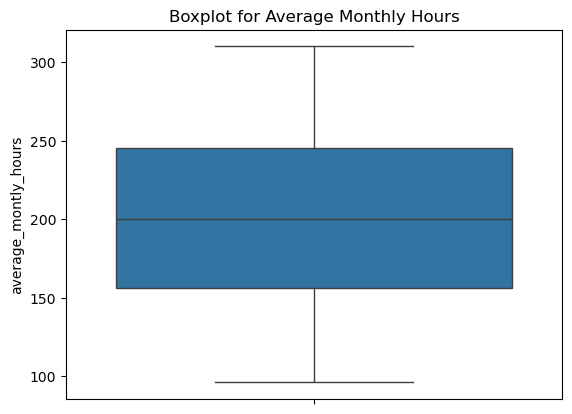

In [36]:
#5. Outlier Detection
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['average_montly_hours'])
plt.title('Boxplot for Average Monthly Hours')
plt.show()


In [44]:
#6. Data Type Conversion
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'salary' column
df['salary_encoded'] = label_encoder.fit_transform(df['salary'])

# Display the encoded column
print(df[['salary', 'salary_encoded']].head())



   salary  salary_encoded
0     low               1
1  medium               2
2  medium               2
3     low               1
4     low               1


C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_23868\899283338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='Set2')  # Use 'df' instead of 'data'


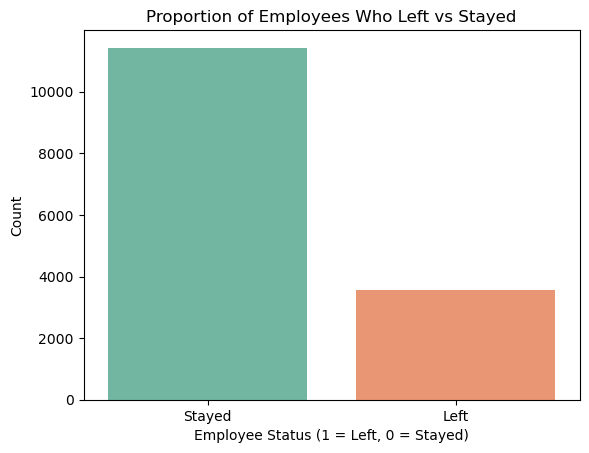

In [54]:
#7. Attrition Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='left', data=df, palette='Set2') 
plt.title('Proportion of Employees Who Left vs Stayed')
plt.xlabel('Employee Status (1 = Left, 0 = Stayed)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)  
plt.show()




In [56]:
#8. Satisfaction Levels
satisfaction_by_status = df.groupby('left')['satisfaction_level'].mean()
print(satisfaction_by_status)


left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64


C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_23868\294132248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='satisfaction_level', data=df, palette='Set2')


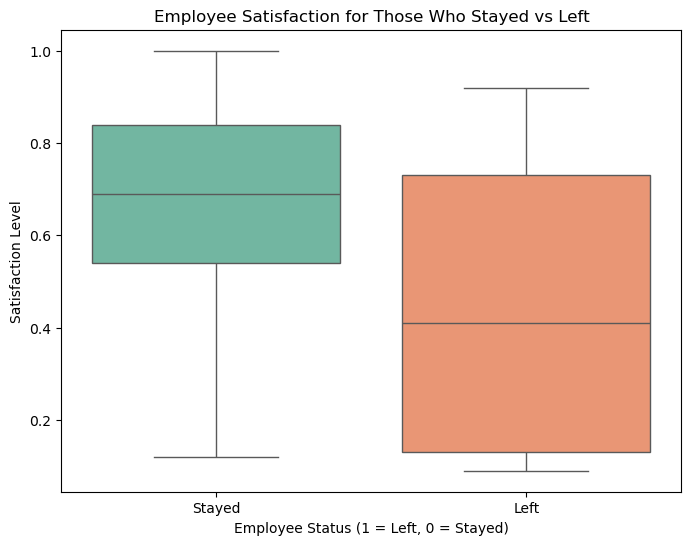

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='Set2')
plt.title('Employee Satisfaction for Those Who Stayed vs Left')
plt.xlabel('Employee Status (1 = Left, 0 = Stayed)')
plt.ylabel('Satisfaction Level')
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)
plt.show()


In [60]:
#9. Department Analysis
department_leave_count = df.groupby('Department')['left'].sum()
highest_leaving_department = department_leave_count.idxmax()
highest_leaving_count = department_leave_count.max()
print(f"The department with the highest number of employees leaving is: {highest_leaving_department}")
print(f"Number of employees who left: {highest_leaving_count}")


The department with the highest number of employees leaving is: sales
Number of employees who left: 1014


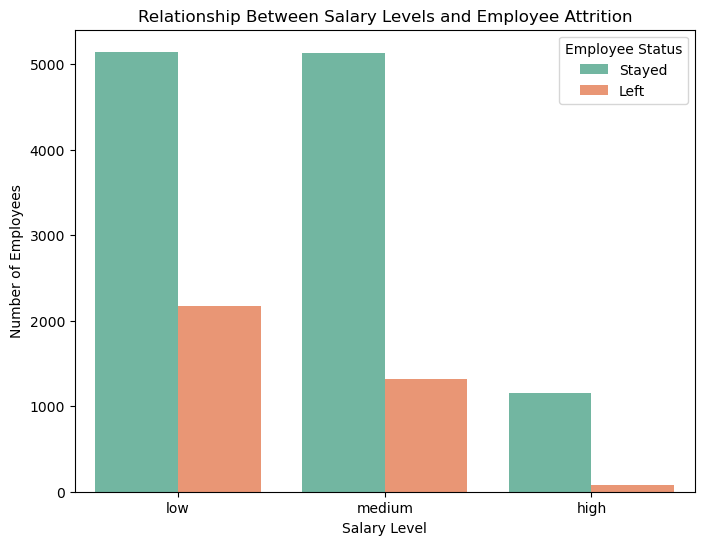

In [62]:
#10. Salary and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df, palette='Set2')
plt.title('Relationship Between Salary Levels and Employee Attrition')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()


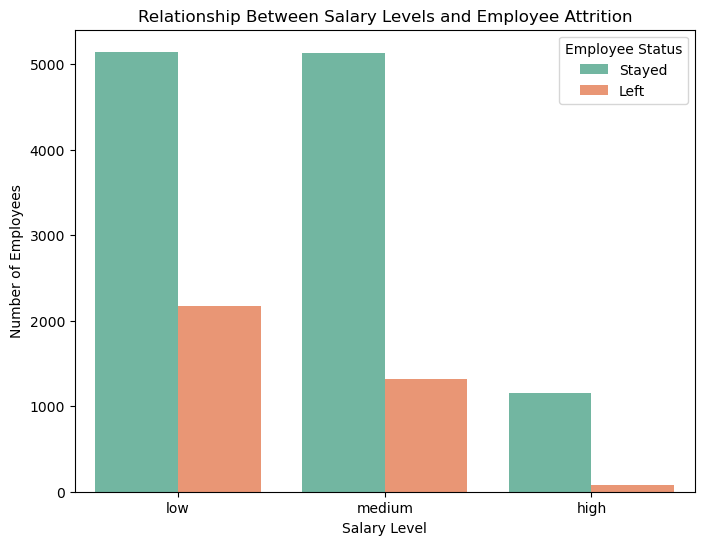

In [64]:
#11. Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df, palette='Set2')
plt.title('Relationship Between Salary Levels and Employee Attrition')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()


In [ ]:
#12. Feature Importance
#Ans. Satisfaction Level:

#Correlation Insight: From previous analysis, we know that employees with lower satisfaction levels are more likely to leave. Satisfaction level is often a key factor in employee retention.
#Justification: Low employee satisfaction is a strong predictor of attrition, as unhappy employees are more likely to leave. Companies often monitor this through surveys and feedback channels.

In [66]:
#13. Feature Transformation

In [ ]:
#14. Insights
#(a) Longer Working Hours Contribute to Higher Attrition.
#(b) Lack of Promotion Opportunities Contributes to Higher Employee Turnover.

In [ ]:
#15. Recommendations
#(a) Monitor Workload and Promote Work-Life Balance
#(b) Enhance Employee Recognition and Reward Programs